# Introducción

Desarrollo de los siguientes métodos para manipulación de imagenes en Python:

* Abrir una imagen de un archivo y disponer la información en una componente imagen.
* Guardar la información de una componente imagen a un archivo.
* Acceder a una componente imagen y leer o modificar su contenido.
* Graficar o modificar una componente imagen.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

## 1. Lectura de la imagen

In [2]:
# Ubicación y nombre de la imagen
path = 'docs/'
file = 'ardu_shield.jpg'

# Objeto Image de la imagen en 'file_path'
im = Image.open(path + file)

type(im)

PIL.JpegImagePlugin.JpegImageFile

## 2. Atributos de la imagen

In [3]:
print('Formato de la imagen:', im.format)
print('Formato de píxel:    ', im.mode)
print('Tamaño (ancho, alto):', im.size)

Formato de la imagen: JPEG
Formato de píxel:     RGB
Tamaño (ancho, alto): (4624, 2604)


## 3. Gráfica de la imagen

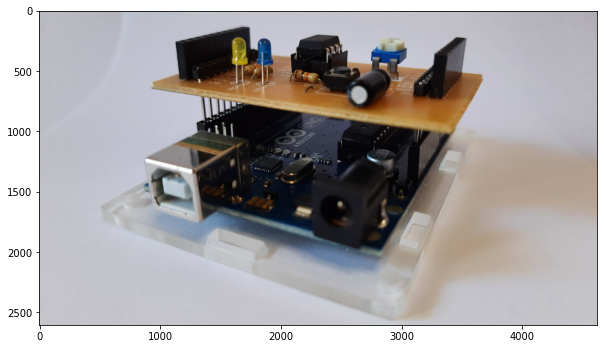

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.show()

## 4. Modificación la imagen

### 4.1. Cortar

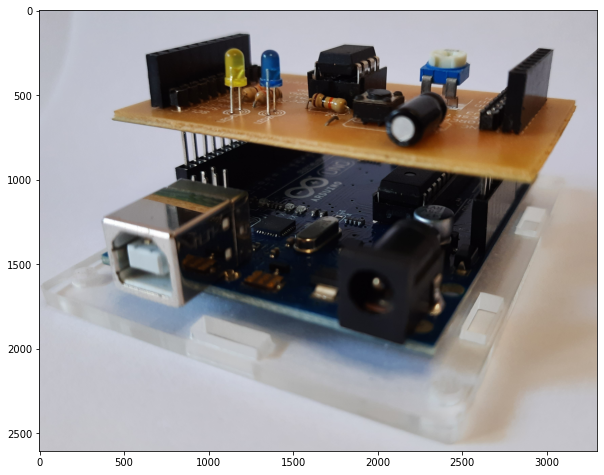

In [5]:
# (left, upper, right, lower)
rectangle = (500,0, 3800, 2604)

im_crop = im.crop(rectangle)

plt.figure(figsize=(10,10))
plt.imshow(im_crop)
plt.show()

### 4.2. Cambiar tamaño

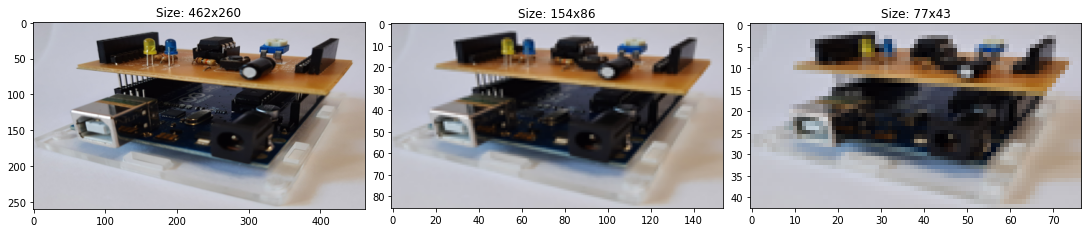

In [47]:
# Lista de los tamaños de la nueva imagen
size = [(int(im.width/10), int(im.height/10)), 
        (int(im.width/30), int(im.height/30)), 
        (int(im.width/60), int(im.height/60))]

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_resized = im_crop.resize(size[i])
    
    axs[i].set_title('Size: ' + str(size[i][0]) + 'x' + str(size[i][1]))
    axs[i].imshow(im_resized)

plt.show()

### 4.3. Transformación de canal

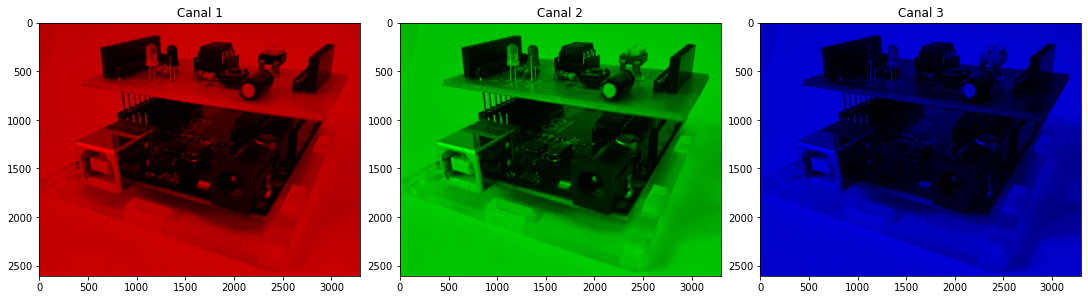

In [46]:
# Make transform matrix, to multiply R by 1.1, G by 0.9 and leave B unchanged
# newRed   = 1.1*oldRed  +  0*oldGreen    +  0*oldBlue  + constant
# newGreen = 0*oldRed    +  0.9*OldGreen  +  0*OldBlue  + constant
# newBlue  = 0*oldRed    +  0*OldGreen    +  1*OldBlue  + constant

# Matríz para extraer los canales RGB por separado de la imagen
#Matrix = ( r,   0,  0, 0, 
#           0,   g,  0, 0, 
#           0,   0,  b, 0)

red_channel = ( 1,   0,  0, 0, 
                0,   0,  0, 0, 
                0,   0,  0, 0 )

green_channel = ( 0,   0,  0, 0, 
                  0,   1,  0, 0, 
                  0,   0,  0, 0 )

blue_channel = ( 0,   0,  0, 0, 
                 0,   0,  0, 0, 
                 0,   0,  1, 0 )

matrix = [red_channel, green_channel, blue_channel]


fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_transform = im_crop.convert("RGB", matrix[i])
    
    axs[i].set_title('Canal ' + str(i+1))
    axs[i].imshow(im_transform)

plt.show()

### 4.4. Cuantificación

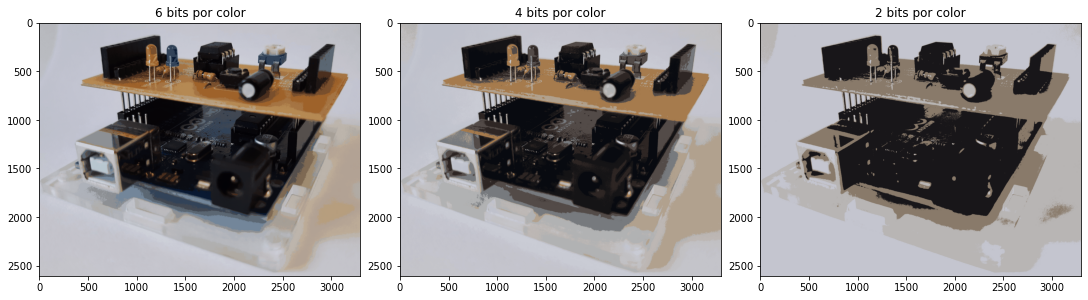

In [45]:
# Cantidad de bits por color
bits = [6, 4, 2]

fig, axs = plt.subplots(1, 3, constrained_layout=True, figsize=(15,15))

for i in range(0, 3):
    
    im_quantize = im_crop.quantize(2**bits[i])
    
    axs[i].set_title(str(bits[i]) + ' bits por color')
    axs[i].imshow(im_quantize)

plt.show()

### 4.5. Rotar

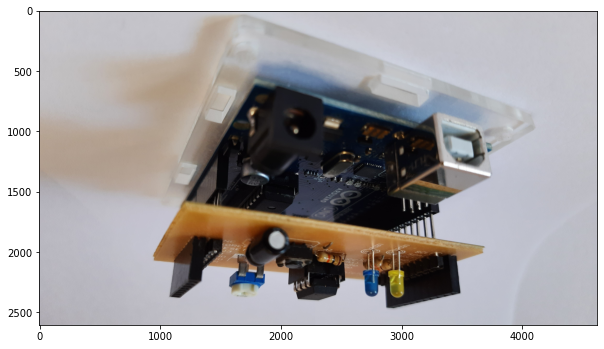

In [8]:
# Se rota la imagen 180°
im_rotated = im.rotate(180)

plt.figure(figsize=(10,10))
plt.imshow(im_rotated)
plt.show()

## 5. Guardar la imagen

In [9]:
new_file_name = 'ardu_resized.jpg'

im_resized.save(path + new_file_name)

## 6. Análisis RGB por pixel

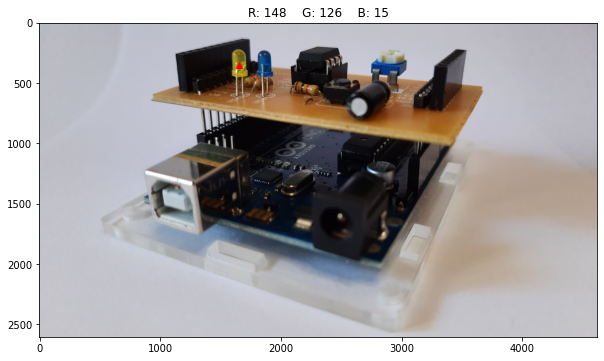

In [10]:
# Valores RGB del píxel en la posición (x, y)
r, g, b = im.getpixel((1650, 350))

plt.figure(figsize=(10,10))
plt.imshow(im)
plt.scatter(1650, 350, marker='^', color='red')
plt.title('R: ' + str(r) + '    G: ' + str(g) + '    B: ' + str(b))
plt.show()

* Obsérvese que el punto ubicado está en el LED de color amarillo. Esto corresponde con los valores arrojados por el método ***getpixel()*** donde el canal azul tiene una magnitud pequeña y el rojo y verde valores muy similares..

### 6.1. Muestreo horizontal

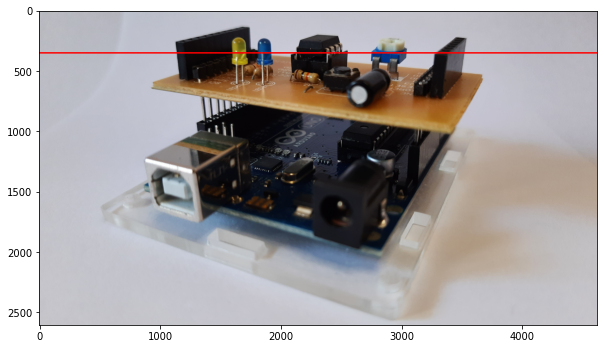

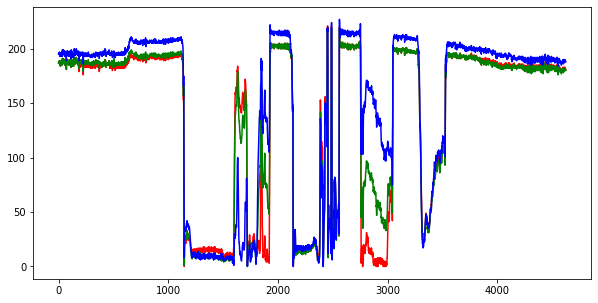

In [11]:
# Píxeles de la coordenada X
x_ = [i for i in range(0,4624)]

# Línea de muestreo
y_ = [350]*4624

# Valores RGB para la línea analizada
red = []
green = []
blue = []

# Barrido de línea horizontal
for i in range(0, len(x_)):
    r, g, b = im.getpixel((i, y_[0]))
    
    red.append(r)
    green.append(g)
    blue.append(b)


plt.figure(figsize=(10,15))
plt.imshow(im)
plt.plot(x_, y_, color='red')
plt.show()

plt.figure(figsize=(10,5))
plt.plot(x_, red, color='red')
plt.plot(x_, green, color='green')
plt.plot(x_, blue, color='blue')
plt.show()

## 7. Convertir a un Numpy array

In [12]:
# Convertir en una matriz Numpy de floats
na = np.array(im).astype(np.float)

In [13]:
na.shape

(2604, 4624, 3)

In [14]:
red_values = na[..., 0]
green_values = na[..., 1]
blue_values = na[..., 2]

print('Valores del canal rojo\n')
print(red_values)

Valores del canal rojo

[[181. 181. 182. ... 173. 175. 178.]
 [179. 180. 182. ... 175. 178. 180.]
 [176. 177. 180. ... 176. 178. 179.]
 ...
 [197. 197. 197. ... 199. 198. 197.]
 [197. 197. 196. ... 199. 198. 198.]
 [200. 199. 196. ... 199. 199. 200.]]


## Links de interés

* [Pillow(PIL) reference](https://pillow.readthedocs.io/en/stable/reference/Image.html): ejemplos y documentación de atributos, funciones, clases y constantes del modulo ***Image*** de la librería PIL.

* [Pillow tutorial](https://pillow.readthedocs.io/en/latest/handbook/tutorial.html): ejemplos usando la clase más popular de PIL: Image.

* [Manipulación de imagenes](https://programmerclick.com/article/8422482547/): ejemplos de procesamiento básico de imagenes con PIL y Matplotlib en Python.